In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [52]:
df = pd.read_csv('C:/Users/AGFirass/Documents/GitHub/customer-churn-prediction-telecom/data/tel_churn.csv')

In [53]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [60]:
df = df.drop('Unnamed: 0', axis=1)

In [61]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [64]:
# Creating X & Y variables

x = df.drop('Churn', axis=1)
print(x)

      SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85           True        False   
1                 0           56.95       1889.50          False         True   
2                 0           53.85        108.15          False         True   
3                 0           42.30       1840.75          False         True   
4                 0           70.70        151.65           True        False   
...             ...             ...           ...            ...          ...   
7027              0           84.80       1990.50          False         True   
7028              0          103.20       7362.90           True        False   
7029              0           29.60        346.45           True        False   
7030              1           74.40        306.60          False         True   
7031              0          105.65       6844.50          False         True   

      Partner_No  Partner_Y

In [66]:
# Creating X & Y variables

y = df['Churn']
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64


In [68]:
# Splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Decision Tree Classifier

In [72]:
model_dt = DecisionTreeClassifier(
    criterion='gini', 
    random_state=100, 
    max_depth=6, 
    min_samples_leaf=8
)

In [74]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [76]:
y_pred = model_dt.predict(x_test)

In [78]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
model_dt.score(x_test, y_pred)

1.0

In [90]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1027
           1       0.61      0.54      0.58       380

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [94]:
print(confusion_matrix(y_test, y_pred))

[[897 130]
 [174 206]]


The data is not balanced, that is why we gonna use SMOTE for upsampling and then we gonna re-train the model

In [97]:
sm =SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [98]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [99]:
model_dt_smote = DecisionTreeClassifier(
    criterion='gini', 
    random_state=100, 
    max_depth=6, 
    min_samples_leaf=8
)

In [100]:
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [102]:
yr_pred = model_dt_smote.predict(xr_test)

In [103]:
yr_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [105]:
model_dt_smote.score(xr_test, yr_pred)

1.0

In [107]:
print(classification_report(yr_test, yr_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       525
           1       0.92      0.92      0.92       644

    accuracy                           0.92      1169
   macro avg       0.91      0.91      0.91      1169
weighted avg       0.92      0.92      0.92      1169



In [108]:
print(confusion_matrix(yr_test, yr_pred))

[[475  50]
 [ 49 595]]


### Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model_rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    random_state=100, 
    max_depth=6, 
    min_samples_leaf=8
)

In [112]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [114]:
y_pred_rf = model_rf.predict(x_test)

In [115]:
print(classification_report(y_test, y_pred_rf, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1027
           1       0.66      0.46      0.54       380

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [116]:
print(confusion_matrix(y_test, y_pred_rf))

[[939  88]
 [207 173]]


The data is not balanced, that is why we gonna use SMOTE for upsampling and then we gonna re-train the model

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [119]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [121]:
model_rf_smote = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    random_state=100, 
    max_depth=6, 
    min_samples_leaf=8
)

In [123]:
model_rf_smote.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [125]:
yr_pred_rf = model_rf_smote.predict(xr_test)

In [126]:
yr_pred_rf

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [130]:
model_rf_smote.score(xr_test, yr_pred_rf)

1.0

In [133]:
print(classification_report(yr_test, yr_pred_rf, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       540
           1       0.92      0.96      0.94       632

    accuracy                           0.94      1172
   macro avg       0.94      0.93      0.93      1172
weighted avg       0.94      0.94      0.94      1172



In [134]:
print(confusion_matrix(yr_test, yr_pred_rf))

[[489  51]
 [ 25 607]]


ROC Curve

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score

In [141]:
yr_prob_rf = model_rf_smote.predict_proba(xr_test)[:, 1]

In [142]:
yr_prob_rf

array([0.00246031, 0.51380156, 0.37091126, ..., 0.89067965, 0.00111897,
       0.8856241 ])

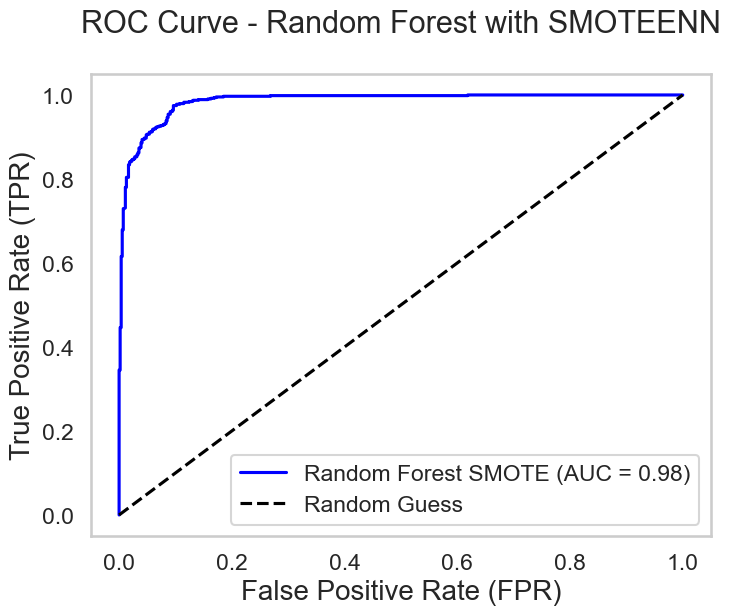

In [146]:
fpr, tpr, thresholds = roc_curve(yr_test, yr_prob_rf)
auc_score = roc_auc_score(yr_test, yr_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest SMOTE (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Random Forest with SMOTEENN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Saving the model

In [135]:
import pickle

In [136]:
filename = 'model.sav'

In [137]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [138]:
load_model = pickle.load(open(filename, 'rb'))

In [139]:
load_model.score(xr_test, yr_test)

0.9351535836177475